In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install -U imbalanced-learn
!pip install pyspellchecker

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Oculta warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
# Tamaño del subconjunto de documentos con el que se va a trabajar.
# Se tomarán num_docs para training/validadación y num_docs para test.
num_docs = 10000
num_docs_test = 10000


# CARGAR DATOS

**DATOS DE ENTRENAMIENTO**

la columna de trastornos indica si el TWEET es de una persona con depresión o es de control.


**control**:     0

**ansiedad**:   1



In [ ]:
ruta_archivo_entrenamiento = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
data_train = data_train.iloc[:num_docs, :]
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     5070 non-null   object 
 1   TWEET_ID    5070 non-null   float64
 2   TWEET_TEXT  10000 non-null  object 
 3   trastorno   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,NaN,NaN,"3522.0, intenta combatir siéntete indeseable c...",1.0
1,302.0,2.147484e+09,"RT @giraltpablo: Lamentablemente, Ecuador perd...",0.0
2,NaN,NaN,Minitrigos helados ansiosos.,1.0
3,NaN,NaN,Está bien. Yo he estado ahí antes. Dudaba de m...,1.0
4,NaN,NaN,¡Siento escuchar eso! Considere la posibilidad...,1.0
5,480.0,2.147484e+09,"No entiendo eso de apoyar en una final,al equi...",0.0
6,266.0,2.147484e+09,"""Come On"" - @akapellah feat @BigSotoLuc &amp; ...",0.0
7,NaN,NaN,",Hola, chico, aparentemente tiene una enfermed...",1.0
8,390.0,2.147484e+09,"RT @excelentum: El que domina su cólera, domin...",0.0
9,288.0,2.147484e+09,RT @Guillodibujante: https://t.co/YO0oAArJJq,0.0


In [ ]:
# Verificar si hay filas nulas o vacías en la columna 'trastorno'
null_values = data_train['trastorno'].isnull().sum()

# Imprimir el número de filas nulas o vacías
print("Número de filas nulas o vacías en la columna 'trastorno':", null_values)

Número de filas nulas o vacías en la columna 'trastorno': 0


In [ ]:
# Eliminar filas con valores nulos en la columna 'trastorno'
data_train = data_train.dropna(subset=['trastorno'])

# Verificar si hay filas nulas o vacías en la columna 'trastorno' después de eliminarlas
null_values = data_train['trastorno'].isnull().sum()

# Imprimir el número de filas nulas o vacías
print("Número de filas nulas o vacías en la columna 'trastorno' después de eliminarlas:", null_values)

Número de filas nulas o vacías en la columna 'trastorno' después de eliminarlas: 0


In [ ]:
data_train['trastorno'] = data_train['trastorno'].astype('int64')
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     5070 non-null   object 
 1   TWEET_ID    5070 non-null   float64
 2   TWEET_TEXT  10000 non-null  object 
 3   trastorno   10000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,NaN,NaN,"3522.0, intenta combatir siéntete indeseable c...",1
1,302.0,2.147484e+09,"RT @giraltpablo: Lamentablemente, Ecuador perd...",0
2,NaN,NaN,Minitrigos helados ansiosos.,1
3,NaN,NaN,Está bien. Yo he estado ahí antes. Dudaba de m...,1
4,NaN,NaN,¡Siento escuchar eso! Considere la posibilidad...,1
5,480.0,2.147484e+09,"No entiendo eso de apoyar en una final,al equi...",0
6,266.0,2.147484e+09,"""Come On"" - @akapellah feat @BigSotoLuc &amp; ...",0
7,NaN,NaN,",Hola, chico, aparentemente tiene una enfermed...",1
8,390.0,2.147484e+09,"RT @excelentum: El que domina su cólera, domin...",0
9,288.0,2.147484e+09,RT @Guillodibujante: https://t.co/YO0oAArJJq,0


**DATOS DE PRUEBA**

In [ ]:
ruta_archivo_prueba = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/test.csv'
data_test = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')
data_test =data_test.iloc[:num_docs_test, :]
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     4866 non-null   float64
 1   TWEET_ID    4866 non-null   float64
 2   TWEET_TEXT  10000 non-null  object 
 3   trastorno   10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,264.0,2.147484e+09,@sua_agu10 Wiiiinaa,0
1,NaN,NaN,¡El alcohol es lo malo! ¡No marihuana! Defende...,1
2,NaN,NaN,"Dios, ni siquiera había considerado que mi an...",1
3,NaN,NaN,"1663.0,solo dios alma espera silencio ven salv...",1
4,316.0,2.147484e+09,@andresacosta20 @latengorepetida @PANINIcol ca...,0


In [ ]:
# Verificar si hay filas nulas o vacías en la columna 'trastorno'
null = data_test['trastorno'].isnull().sum()

# Imprimir el número de filas nulas o vacías
print("Número de filas nulas o vacías en la columna 'trastorno':", null)

Número de filas nulas o vacías en la columna 'trastorno': 0


# Preparación de los datos

*Eliminar etiquedas HTML*

In [ ]:
import re

def removeHTML(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', text)
        return cleantext
    else:
        return text  # Devolver el valor original si no es de tipo string

*Limpiar texto*

In [ ]:
import re
import string

def clean(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        # Eliminar hashtags
        text = re.sub(r'#\w+', '', text)

        # Eliminar URLs o enlaces
        text = re.sub(r'(https?://)?[a-zA-Z0-9]+\.[a-zA-Z0-9]+\S*', '', text)

        # Eliminar nombres de usuarios de Twitter
        text = re.sub(r'@\w+', '', text)

        # Eliminar Nombres propios
        text = re.sub(r'\b[A-Z][a-z]+\b', '', text)

        # Eliminar todos los caracteres especiales
        text = re.sub(r'[^\w\s]+', '', text)

        # Eliminar prefijos y números
        text = re.sub(r'\b\w{1,2}\b|\d+', '', text)

        # Eliminar palabras específicas
        specific_words = ['retweet', 'retweets', 'hashtag', 'trending', 'mención', 'enlace', 'emoji', 'timeline', 'interacciones',
                          'tuit', 'seguidores', 'notificaciones', 'seguir', 'favorito', 'perfil', 'tendencia', 'influencer',
                          'compartir', 'actualización', 'explorar', 'seguir', 'comunidad', 'contenido', 'popular',
                          'recomendar', 'experiencia', 'conectar', 'comentar', 'compartir', 'comunidad', 'actualización',
                          'drk', 'followers', 'stats', 'for', 'new', 'little', 'unfollower', 'unfollowers', 'today', 'shit','twitter','nombre',
                          'eric','story','great', 'short','squeeze','piggly','wiggly','hmv','even','follas','you','i','he','she',
                          'it','we','they','the','and','that','these','those','tweet','followed','follower']
        text = ' '.join([word for word in text.split() if word not in specific_words])

        # Eliminar emojis
        emojis = re.findall(r'[^\w\s,]', text)
        cleaned_emojis = [emoji for emoji in emojis if emoji not in ['@', '#', '/', '?','¿','.','…','"',':','“','!','¡','°','-',"‘",'’',
                                                                     '=',';','(',')',"'","'",'&','€','%','$','*','+','|', '”','🇦','🇷',',',
                                                                     ', ','—','«',' »','»','« ','[, ]','[,]',',',', ','',' ',' ♀',' 🏽']]
        for emoji in cleaned_emojis:
            text = text.replace(emoji, '')

        # Convertir el texto a minúsculas
        text = text.lower()

        # Eliminar signos de puntuación
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

        # Devuelve el texto limpio
        return text
    else:
        return text  # Devolver el valor original si no es de tipo string


#Elaboración de la lista de palabras relevantes a partir de una bolsa de palabras del mismo conjunto de datos

In [ ]:
import nltk
nltk.download('stopwords')  #Solamente se ha de descargar la primera vez.
stopwords_en = nltk.corpus.stopwords.words('spanish')   # Extrae las stopwords en español

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import spacy
from spacy.lang.es import Spanish
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Cargar modelo de spaCy
nlp = spacy.load("es_core_news_sm")

# Cargar stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Inicializar stemmer de NLTK
stemmer = PorterStemmer()

In [ ]:
# # Función para lematizar y extraer términos
# from nltk.stem import SnowballStemmer

# spanish_stemmer = SnowballStemmer('spanish')

# def extractTerms(text):
#     # Tokenización y lematización con spaCy
#     doc = nlp(text)
#     lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

#     # Stemming con SnowballStemmer de NLTK
#     stemmed_terms = [spanish_stemmer.stem(term) for term in lemmatized_terms]

#     return stemmed_terms
# # Ejemplo de uso
# texto_ejemplo = "Los perrito  están corriendo en el parque y jugando felices."
# terminos_extraidos = extractTerms(texto_ejemplo)
# print(terminos_extraidos)

In [ ]:
# Función para lematizar y extraer términos
def extractTerms(text):
    # Tokenización y lematización con spaCy
    doc = nlp(text)
    lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

    return lemmatized_terms
# Ejemplo de uso
texto_ejemplo = "Los gatos están saltando sobre las vallas"
terminos_extraidos = extractTerms(texto_ejemplo)
print(terminos_extraidos)

['gato', 'saltar', 'valla']


# Preprocesamieto del conjunto de datos de entrenamiento

In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(removeHTML)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(clean)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(extractTerms)
data_train.head(10)

,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,NaN,NaN,"[intentar, combatir, siéntete, indeseable, per...",1.0
1,302.0,2.147484e+09,"[perder, carta, ganador, localía, allí, escapa...",0.0
2,NaN,NaN,"[helado, ansioso]",1.0
3,NaN,NaN,"[bien, ahí, amigo, amor, saber, decir, intenta...",1.0
4,NaN,NaN,"[escuchar, posibilidad, utilizar, aceite, esen...",1.0
5,480.0,2.147484e+09,"[entender, apoyar, finalal, equipo, elimino, c...",0.0
6,266.0,2.147484e+09,"[feat, amp, mp]",0.0
7,NaN,NaN,"[chico, aparentemente, enfermedad, terminal, d...",1.0
8,390.0,2.147484e+09,"[dominar, cólero, dominar, peor, enemigo]",0.0
9,288.0,2.147484e+09,[],0.0


In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)


Número de elementos vacíos en la columna 'TWEET_TEXT': 278


In [ ]:
# Filtrar filas donde 'TWEET_TEXT' no sea una lista vacía
data_train = data_train[data_train['TWEET_TEXT'].apply(len) > 0]

# Reiniciar el índice del DataFrame después de eliminar filas
data_train.reset_index(drop=True, inplace=True)

In [ ]:

# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 0


In [ ]:
# from spellchecker import SpellChecker

# def corrector_ortografico(tokens):
#     spell = SpellChecker(language='es')
#     tokens_corregidos = [spell.correction(token) if spell.correction(token) is not None else token for token in tokens]
#     return tokens_corregidos

# def corregir_palabras_largas(tokens):
#     tokens_corregidos = []
#     for token in tokens:
#         # Corregir repeticiones de letras
#         token_corregido = re.sub(r'(.)\1+', r'\1\1', token)

#         # Corregir alargamiento de palabras
#         token_corregido = re.sub(r'(\w)\1{2,}', r'\1\1', token_corregido)

#         # Eliminar vocales repetidas más de 2 veces seguidas
#         token_corregido = re.sub(r'([aeiouáéíóú]{2,})\1+', r'\1', token_corregido, flags=re.IGNORECASE)

#         tokens_corregidos.append(token_corregido)
#     return tokens_corregidos

In [ ]:

data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x) # Combinar los elementos de la lista en una sola cadena separados por espacios
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     4809 non-null   object 
 1   TWEET_ID    4809 non-null   float64
 2   TWEET_TEXT  9722 non-null   object 
 3   trastorno   9722 non-null   float64
dtypes: float64(2), object(2)
memory usage: 303.9+ KB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,NaN,NaN,intentar combatir siéntete indeseable perfecci...,1.0
1,302.0,2.147484e+09,perder carta ganador localía allí escapar posi...,0.0
2,NaN,NaN,helado ansioso,1.0
3,NaN,NaN,bien ahí amigo amor saber decir intentar dar y...,1.0
4,NaN,NaN,escuchar posibilidad utilizar aceite esencial ...,1.0
5,480.0,2.147484e+09,entender apoyar finalal equipo elimino compent...,0.0
6,266.0,2.147484e+09,feat amp mp,0.0
7,NaN,NaN,chico aparentemente enfermedad terminal decir ...,1.0
8,390.0,2.147484e+09,dominar cólero dominar peor enemigo,0.0
9,NaN,NaN,sfs dama favor todavía amar fanático preferibl...,1.0


# Representación de los datos mediante una matriz TF-IDF

se guardan los valores de la matriz TFIDF y los array X y para futuros entrenamientos

Se procederá a construir un conjunto de entrenamiento a partir de la representación de bolsa de palabras o inglés (Bag of Words.)

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
# Crear un transformador TfidfVectorizer con el tokenizer extractTerms y rango de n-gramas (1, 1)
tfidf_vect  = TfidfVectorizer(tokenizer = extractTerms,
                              ngram_range=(1,1))
# Aplicar el TfidfVectorizer a la columna 'TWEET_TEXT' en data_train y obtener la matriz TF-IDF
tfidf_train  = tfidf_vect.fit_transform(data_train['TWEET_TEXT'].values)
# Imprimir el tamaño del vocabulario construido por TfidfVectorizer
print("El tamaño del vocabulario es: ", len(tfidf_vect.vocabulary_))

# Crear arrays X y y para los datos y etiquetas respectivamente
X = tfidf_train # Matriz TF-IDF
y = data_train['trastorno'].values # Etiquetas de trastorno de la columna 'trastorno'

El tamaño del vocabulario es:  14340


# Aprendizaje del modelo: Red Neuronal simple

# Entrenamiento con validación 70 - 30

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Supongamos que X es tu matriz TF-IDF y y son las etiquetas (0 o 1)

# Convertir la matriz TF-IDF a una matriz densa de Numpy
X_dense = X.toarray()

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_dense, y, test_size=0.25, random_state=42)

# Crear una red neuronal secuencial
model = Sequential()

# Agregar una capa de entrada con el número de características (vocabulario) en tu matriz TF-IDF
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Dropout para regularización

# Agregar una capa oculta
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout para regularización

# Agregar una capa de salida con una neurona y función de activación sigmoide para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en los datos de entrenamiento
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de validación
y_val_pred = (model.predict(X_val) > 0.5).astype(int)

# Calcular métricas de evaluación en el conjunto de validación
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Calcular métricas de evaluación en el conjunto de entrenamiento
y_train_pred = (model.predict(X_train) > 0.5).astype(int)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)



Epoch 1/10
456/456 [==============================] - 9s 7ms/step - loss: 0.3103 - accuracy: 0.8752 - val_loss: 0.1648 - val_accuracy: 0.9367
Epoch 2/10
456/456 [==============================] - 2s 4ms/step - loss: 0.1001 - accuracy: 0.9662 - val_loss: 0.1664 - val_accuracy: 0.9371
Epoch 3/10
456/456 [==============================] - 2s 4ms/step - loss: 0.0512 - accuracy: 0.9850 - val_loss: 0.1889 - val_accuracy: 0.9323
Epoch 4/10
456/456 [==============================] - 2s 4ms/step - loss: 0.0313 - accuracy: 0.9919 - val_loss: 0.2112 - val_accuracy: 0.9305
Epoch 5/10
456/456 [==============================] - 2s 4ms/step - loss: 0.0196 - accuracy: 0.9947 - val_loss: 0.2317 - val_accuracy: 0.9288
Epoch 6/10
456/456 [==============================] - 2s 4ms/step - loss: 0.0157 - accuracy: 0.9961 - val_loss: 0.2567 - val_accuracy: 0.9266
Epoch 7/10
456/456 [==============================] - 2s 4ms/step - loss: 0.0120 - accuracy: 0.9973 - val_loss: 0.2820 - val_accuracy: 0.9284
Epoch 

In [ ]:
# Imprimir métricas de entrenamiento
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Exactitud (entrenamiento): {round(accuracy_train, 2) * 100}%")
print(f"Precisión (entrenamiento): {round(precision_train, 2) * 100}%")
print(f"Recall (entrenamiento): {round(recall_train, 2) * 100}%")
print(f"F1-score (entrenamiento): {round(f1_train, 2) * 100}%")
print('-------------------------------------------------------------------------')
# Imprimir métricas de evaluación
print(f"Exactitud en el conjunto de validación: {round(accuracy, 2) * 100}%")
print(f"Precisión en el conjunto de validación: {round(precision, 2) * 100}%")
print(f"Recall en el conjunto de validación: {round(recall, 2) * 100}%")
print(f"F1-score en el conjunto de validación: {round(f1, 2) * 100}%")


Métricas en el conjunto de entrenamiento:
Exactitud (entrenamiento): 100.0%
Precisión (entrenamiento): 100.0%
Recall (entrenamiento): 100.0%
F1-score (entrenamiento): 100.0%
-------------------------------------------------------------------------
Exactitud en el conjunto de validación: 92.0%
Precisión en el conjunto de validación: 91.0%
Recall en el conjunto de validación: 93.0%
F1-score en el conjunto de validación: 92.0%


# Entrenamiento con validación cruzada k=10

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# Supongamos que X es tu matriz TF-IDF y y son las etiquetas (0 o 1)
X_dense = X.toarray()
y = np.array(y)

# Crear una red neuronal secuencial
model = Sequential()

# Agregar una capa de entrada con el número de características (vocabulario) en tu matriz TF-IDF
model.add(Dense(128, activation='relu', input_dim=X_dense.shape[1]))
model.add(Dropout(0.5))  # Dropout para regularización

# Agregar una capa oculta
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout para regularización

# Agregar una capa de salida con una neurona y función de activación sigmoide para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Definir la estrategia de validación cruzada (k=10)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar métricas de entrenamiento y validación
train_accuracy_scores = []
train_precision_scores = []
train_recall_scores = []
train_f1_scores = []

# Realizar la validación cruzada
for train_index, val_index in cv.split(X_dense, y):
    X_train, X_val = X_dense[train_index], X_dense[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Entrenar el modelo en los datos de entrenamiento
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluar el modelo en el conjunto de entrenamiento
    y_train_pred = (model.predict(X_train) > 0.5).astype(int)

    # Calcular métricas de entrenamiento y agregarlas a las listas
    train_accuracy_scores.append(accuracy_score(y_train, y_train_pred))
    train_precision_scores.append(precision_score(y_train, y_train_pred))
    train_recall_scores.append(recall_score(y_train, y_train_pred))
    train_f1_scores.append(f1_score(y_train, y_train_pred))

# Calcular las métricas promediadas en entrenamiento
train_accuracy_mean = np.mean(train_accuracy_scores)
train_precision_mean = np.mean(train_precision_scores)
train_recall_mean = np.mean(train_recall_scores)
train_f1_mean = np.mean(train_f1_scores)

# Imprimir las métricas en entrenamiento
print("Entrenamiento - Accuracy: {:.2f}%".format(100 * train_accuracy_mean))
print("Entrenamiento - Precision: {:.2f}%".format(100 * train_precision_mean))
print("Entrenamiento - Recall: {:.2f}%".format(100 * train_recall_mean))
print("Entrenamiento - F1 Score: {:.2f}%".format(100 * train_f1_mean))

# Listas para almacenar métricas de validación
val_accuracy_scores = []
val_precision_scores = []
val_recall_scores = []
val_f1_scores = []

# Realizar la validación cruzada
for train_index, val_index in cv.split(X_dense, y):
    X_train, X_val = X_dense[train_index], X_dense[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Entrenar el modelo en los datos de entrenamiento
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluar el modelo en el conjunto de validación
    y_val_pred = (model.predict(X_val) > 0.5).astype(int)

    # Calcular métricas de validación y agregarlas a las listas
    val_accuracy_scores.append(accuracy_score(y_val, y_val_pred))
    val_precision_scores.append(precision_score(y_val, y_val_pred))
    val_recall_scores.append(recall_score(y_val, y_val_pred))
    val_f1_scores.append(f1_score(y_val, y_val_pred))

# Calcular las métricas promediadas en validación
val_accuracy_mean = np.mean(val_accuracy_scores)
val_precision_mean = np.mean(val_precision_scores)
val_recall_mean = np.mean(val_recall_scores)
val_f1_mean = np.mean(val_f1_scores)

# Imprimir las métricas en validación
print("Validación - Accuracy: {:.2f}%".format(100 * val_accuracy_mean))
print("Validación - Precision: {:.2f}%".format(100 * val_precision_mean))
print("Validación - Recall: {:.2f}%".format(100 * val_recall_mean))
print("Validación - F1 Score: {:.2f}%".format(100 * val_f1_mean))


274/274 [==============================] - 1s 2ms/step
Entrenamiento - Accuracy: 99.96%
Entrenamiento - Precision: 99.97%
Entrenamiento - Recall: 99.95%
Entrenamiento - F1 Score: 99.96%
31/31 [==============================] - 0s 2ms/step
Validación - Accuracy: 99.96%
Validación - Precision: 99.98%
Validación - Recall: 99.94%
Validación - F1 Score: 99.96%


In [ ]:
# Imprimir las métricas en entrenamiento
print("Entrenamiento - Accuracy: {:.2f}%".format(100 * train_accuracy_mean))
print("Entrenamiento - Precision: {:.2f}%".format(100 * train_precision_mean))
print("Entrenamiento - Recall: {:.2f}%".format(100 * train_recall_mean))
print("Entrenamiento - F1 Score: {:.2f}%".format(100 * train_f1_mean))
print('-----------------------------------------------------------------------')
# Imprimir las métricas en validación
print("Validación - Accuracy: {:.2f}%".format(100 * val_accuracy_mean))
print("Validación - Precision: {:.2f}%".format(100 * val_precision_mean))
print("Validación - Recall: {:.2f}%".format(100 * val_recall_mean))
print("Validación - F1 Score: {:.2f}%".format(100 * val_f1_mean))

Entrenamiento - Accuracy: 99.96%
Entrenamiento - Precision: 99.97%
Entrenamiento - Recall: 99.95%
Entrenamiento - F1 Score: 99.96%
-----------------------------------------------------------------------
Validación - Accuracy: 99.96%
Validación - Precision: 99.98%
Validación - Recall: 99.94%
Validación - F1 Score: 99.96%


#Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_val)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_val, y_pred_binario)
prop_real = np.sum(y_val)/len(y_val)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_val)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

31/31 [==============================] - 0s 2ms/step
Matriz de confusión: 

 [[481   0]
 [  1 490]] 

Proporción de comentarios positivos: 0.51
Proporción de comentarios positivos etiquetados: 0.50


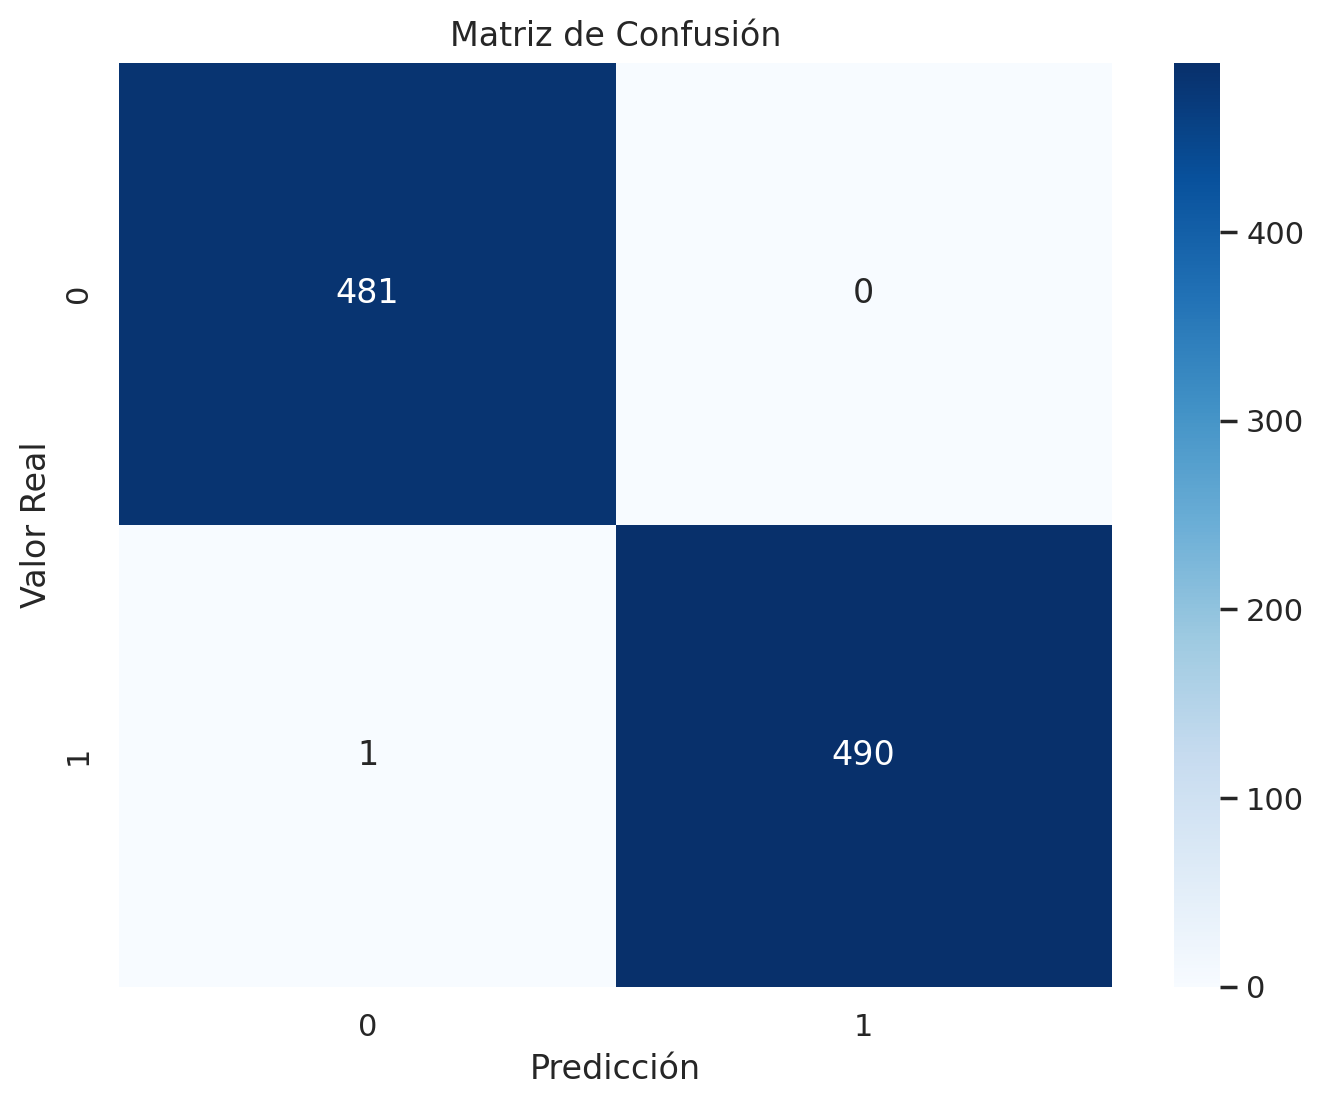

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

# Evaluación  del modelo Cv=10

In [ ]:
# Aplicar transformaciones al conjunto de pruebas
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(removeHTML)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(clean)
data_test.head(10)

,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,264.0,2.147484e+09,,0
1,NaN,NaN,alcohol malo marihuana defenderé marihuana has...,1
2,NaN,NaN,siquiera había considerado que ansiedad ahora ...,1
3,NaN,NaN,dios alma espera silencio ven salvacion solo r...,1
4,316.0,2.147484e+09,cambiaton laminas mañana macdonals parque las,0
5,NaN,NaN,pista patinaje está doble llena niños hoy ansi...,1
6,136.0,2.147484e+09,igual seg después sea arreché,0
7,NaN,NaN,idiota gracias por ese episodio hermano sois a...,1
8,NaN,NaN,muchas etiquetas sobre enfermedades mentales o...,1
9,216.0,2.147484e+09,cuando clavado visto caradura,0


In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_test['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 269


In [ ]:
# Filtrar filas donde 'TWEET_TEXT' no sea una lista vacía
data_test = data_test[data_test['TWEET_TEXT'].apply(len) > 0]

# Reiniciar el índice del DataFrame después de eliminar filas
data_test.reset_index(drop=True, inplace=True)
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_test['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
import os
# Cargar el modelo entrenado
model_path = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/TWEETS_Ansiedad (RN-CV=10).pkl'
loaded_model = joblib.load(model_path)
tfidf_test = tfidf_vect.transform(data_test['TWEET_TEXT'])

# Convertir la matriz TF-IDF de tfidf_test a una matriz densa de NumPy
tfidf_test_dense = tfidf_test.toarray()

# Crear el conjunto de pruebas
X_test = tfidf_test_dense  # matriz TF-IDF densa
y_test = data_test['trastorno'].values

# Predicciones en el conjunto de pruebas
y_test_pred = (loaded_model.predict(X_test) > 0.5).astype(int)

# Calcular precisión en el conjunto de pruebas
precision_test = precision_score(y_test, y_test_pred)

# Calcular exhaustividad (recall) en el conjunto de pruebas
recall_test = recall_score(y_test, y_test_pred)

# Calcular puntuación F1 en el conjunto de pruebas
f1_test = f1_score(y_test, y_test_pred)

# Calcular exactitud en el conjunto de pruebas
accuracy_test = loaded_model.evaluate(X_test, y_test, batch_size=8, verbose=0)[1] * 100

# Mostrar precisión en el conjunto de pruebas
print("Precisión (test): {:.2f}%".format(precision_test * 100))

# Mostrar exhaustividad en el conjunto de pruebas
print("Exhaustividad (test): {:.2f}%".format(recall_test * 100))

# Mostrar puntuación F1 en el conjunto de pruebas
print("Puntuación F1 (test): {:.2f}%".format(f1_test * 100))

# Mostrar la exactitud en el conjunto de pruebas
print("Exactitud (test): {:.2f}%".format(accuracy_test))

305/305 [==============================] - 4s 2ms/step
Precisión (test): 95.07%
Exhaustividad (test): 89.02%
Puntuación F1 (test): 91.95%
Exactitud (test): 91.81%


#Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(X_test)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_test, y_pred_binario)
prop_real = np.sum(y_test)/len(y_test)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_test)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

305/305 [==============================] - 1s 2ms/step
Matriz de confusión: 

 [[4385  236]
 [ 561 4549]] 

Proporción de comentarios positivos: 0.53
Proporción de comentarios positivos etiquetados: 0.49


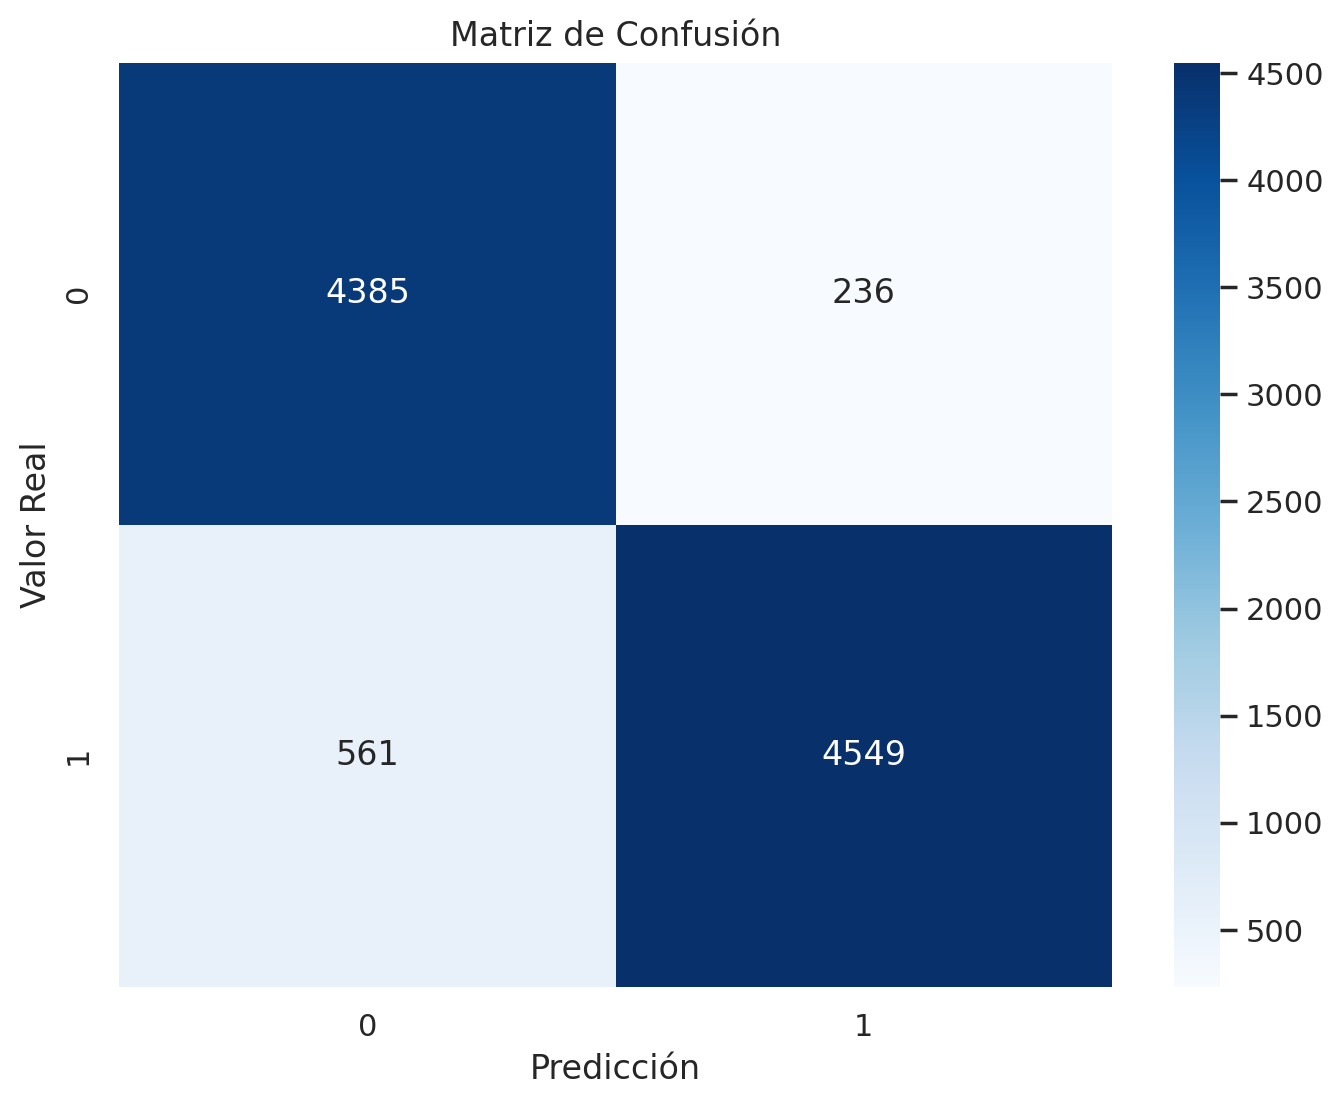

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

Guardar el modelo

In [ ]:
import joblib
import os
# Directorio para guardar modelos entrenados
model_dir = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)'
model_filename = 'TWEETS_Ansiedad (RN-CV=10).pkl'
model_path_p = os.path.join(model_dir, model_filename)

# Guardar el modelo entrenado
joblib.dump(model, model_path_p)

['/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/TWEETS_Ansiedad (RN-CV=10).pkl']

# Modelo Entrenado

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import joblib
import os
from scipy.sparse import csr_matrix
# Cargar el modelo entrenado
model_path = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs ansiedad)/TWEETS_Ansiedad (RN-CV=10).pkl'
loaded_model = joblib.load(model_path)

# Texto de ejemplo para predecir
new_tweet = "Hoy vamos a tener un buen día!!!! Todo por que hoy es san viernes https://t.co/yIXPck46H2"


# Preprocesamiento del texto
new_tweet_cleaned = clean(removeHTML(new_tweet))
new_tweet_extracted = extractTerms(new_tweet_cleaned)
new_tweet_combined = ' '.join(new_tweet_extracted)
new_tweet_tfidf = tfidf_vect.transform([new_tweet_combined])



# Supongamos que 'sparse_matrix' es tu matriz dispersa
dense_matrix = new_tweet_tfidf.toarray()

# Hacer la predicción y obtener las probabilidades de predicción
proba_prediction = loaded_model.predict(dense_matrix)

# Verificar la forma de proba_prediction
if proba_prediction.shape[1] == 1:
    # Solo una probabilidad en proba_prediction, se asume que es la probabilidad de clase 1
    control_prob = 1 - proba_prediction[0][0]  # Probabilidad de ser control
    depresion_prob = proba_prediction[0][0]  # Probabilidad de ser depresión
else:
    # Hay dos probabilidades en proba_prediction (clases binarias)
    control_prob = 1 - proba_prediction[0][0]  # Probabilidad de ser control
    depresion_prob = proba_prediction[0][0]  # Probabilidad de ser depresión

# Las probabilidades de clase están en 'control_prob' y 'depresion_prob'

# Imprimir el resultado basado en las probabilidades
print(new_tweet)
print('------------------------------------------------------------------')
if depresion_prob > control_prob:
    print("Este tweet es de ansiedad")
    print("Probabilidad de que el tweet sea de ansiedad: {:.2f}%".format(depresion_prob * 100))
else:
    print("Este tweet No es de ansiedad")
    print("Probabilidad de que el tweet no sea de ansiedad: {:.2f}%".format(control_prob * 100))




1/1 [==============================] - 0s 50ms/step
Hoy vamos a tener un buen día!!!! Todo por que hoy es san viernes https://t.co/yIXPck46H2
------------------------------------------------------------------
Este tweet No es de ansiedad
Probabilidad de que el tweet no sea de ansiedad: 100.00%


#Análisis (borrador)
la implementación de la bolsa de palabra en conjunto con la técnica de TF-IDF son muy ultil a la hora de caracterizar las palabras en un arreglo vectorial para usarla como datos de entrenamientos a los diferentes modelos.

lo visto en la implementación de estas tecnicas de BoW y TF-IDF es que crea una matriz muy grande de vectores dispersos (si hay 81mil palabaras o vocabulario en el los datos de entrenamiento se crea un vector de 81mil termiminos donde solo 1 sera la representación de esa palabra así con el resto de las 81mil palabra) ocasionado que el proceso de entrenamiento sea muy pesado computacionalmente y a su vez las palabras pierden el consteto al aplicar estas tecnicas de BoW y TF-IDF.

en la parte del costo computacional se hace notar en los otros modelos como SVM, RL y RF que el proceso de entrenamiento es muy demorado al usar un conjunto de entrenamiento de más de 200mil datos. Esto se observa mejor al implementar una red neuronal secuencial donde el proceso es tan elevado que consume toda la RAM y GPU disponible lo que llevo a reducir el tamaño de los datos a 20mil a proximadamente el 10% de la cantidad de los datos en total para poder entrenar el modelo de forma correcta.

aunque se usaron menos datos para la red neuronal fue el modelo que mejor se comporto a la hora de entrenar con estas técnicas ya que obtuvo el mejor resultado de validación con los datos entrenados  y el mejor resultado de evaluación con nuevos datos de prueba.

En conclusión, se puede decir que estas tecnica comple con su cometido de carctetizar los datos en una erreglo vectorial para el entrenamiento de los diferentes modelos de clasificación. Pero conyeva una gran costo computacional a la hora de entrara estos modelos por que el  erreglo vectorial  se compone una gran matriz dispersa.